In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
df=pd.read_csv(r"C:\Users\PC\Documents\Animal_behaviour_accelometere_data Folder\abp_accel.csv")

In [3]:
df.head(21)

,timestamp,x,y,z
0,2015-06-12 13:30:00.161041,100,620,804
1,2015-06-12 13:30:00.260490,68,640,800
2,2015-06-12 13:30:00.359939,48,628,884
3,2015-06-12 13:30:00.459388,44,616,888
4,2015-06-12 13:30:00.558837,76,628,860
5,2015-06-12 13:30:00.658286,104,616,868
6,2015-06-12 13:30:00.757735,120,596,868
7,2015-06-12 13:30:00.857184,136,612,812
8,2015-06-12 13:30:00.956633,164,624,840
9,2015-06-12 13:30:01.056082,168,596,840


In [4]:
df.shape

(14595853, 4)

In [5]:
#Calculating vector magnitude (I used median)

In [6]:
# Calculate Vector Magnitude
df['VM'] = np.sqrt(df['x']**2 + df['y']**2 + df['z']**2)

# Display first few rows with VM
print(df.head())

                    timestamp    x    y    z           VM
0  2015-06-12 13:30:00.161041  100  620  804  1020.203901
1  2015-06-12 13:30:00.260490   68  640  800  1026.754109
2  2015-06-12 13:30:00.359939   48  628  884  1085.423420
3  2015-06-12 13:30:00.459388   44  616  888  1081.635798
4  2015-06-12 13:30:00.558837   76  628  860  1067.595429


In [7]:
df.head(11)

,timestamp,x,y,z,VM
0,2015-06-12 13:30:00.161041,100,620,804,1020.203901
1,2015-06-12 13:30:00.260490,68,640,800,1026.754109
2,2015-06-12 13:30:00.359939,48,628,884,1085.423420
3,2015-06-12 13:30:00.459388,44,616,888,1081.635798
4,2015-06-12 13:30:00.558837,76,628,860,1067.595429
5,2015-06-12 13:30:00.658286,104,616,868,1069.437235
6,2015-06-12 13:30:00.757735,120,596,868,1059.735816
7,2015-06-12 13:30:00.857184,136,612,812,1025.857690
8,2015-06-12 13:30:00.956633,164,624,840,1059.184592
9,2015-06-12 13:30:01.056082,168,596,840,1043.570793


In [8]:
# Calculate Vector Magnitude with 2 decimal places
df['VM'] = np.round(np.sqrt(df['x']**2 + df['y']**2 + df['z']**2), 2)

# Display first few rows with VM
print(df.head())

                    timestamp    x    y    z       VM
0  2015-06-12 13:30:00.161041  100  620  804  1020.20
1  2015-06-12 13:30:00.260490   68  640  800  1026.75
2  2015-06-12 13:30:00.359939   48  628  884  1085.42
3  2015-06-12 13:30:00.459388   44  616  888  1081.64
4  2015-06-12 13:30:00.558837   76  628  860  1067.60


In [9]:
# Calculate median of VM column
vm_median = df['VM'].median()
print(f"The median VM value is: {vm_median:.2f}")


The median VM value is: 1050.14


In [10]:
# Get key statistics of VM column
vm_stats = df['VM'].describe()
print("\nVM Column Statistics:")
print(vm_stats)



VM Column Statistics:
count    1.459585e+07
mean     1.047446e+03
std      3.935866e+01
min      3.418000e+01
25%      1.036950e+03
50%      1.050140e+03
75%      1.059190e+03
max      2.984700e+03
Name: VM, dtype: float64


In [11]:
# Create state column based on median threshold
threshold = 1050.14
df['state'] = df['VM'].apply(lambda x: 'resting' if x <= threshold else 'active')

# Calculate statistics for each state
state_stats = df.groupby('state')['VM'].describe()
print("\nStatistics by Activity State:")
print(state_stats)

# Calculate percentage of time in each state
state_distribution = df['state'].value_counts(normalize=True) * 100
print("\nPercentage of Time in Each State:")
print(state_distribution.round(2))



Statistics by Activity State:
             count         mean        std      min      25%      50%  \
state                                                                   
active   7295922.0  1066.974759  38.265383  1050.15  1054.61  1059.19   
resting  7299931.0  1027.927881  29.526304    34.18  1019.81  1036.96   

             75%      max  
state                      
active   1066.96  2984.70  
resting  1044.75  1050.14  

Percentage of Time in Each State:
state
resting    50.01
active     49.99
Name: proportion, dtype: float64


In [12]:
state_distribution.head()

state
resting    50.013733
active     49.986267
Name: proportion, dtype: float64

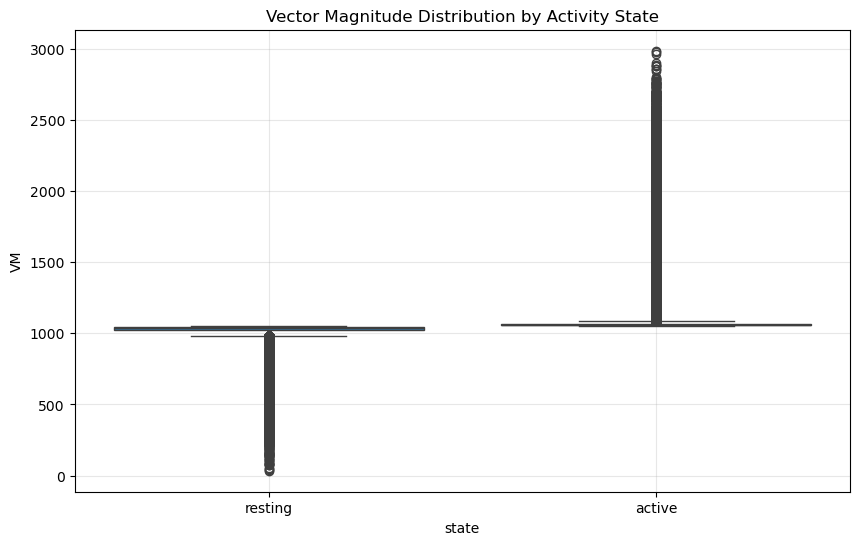

C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


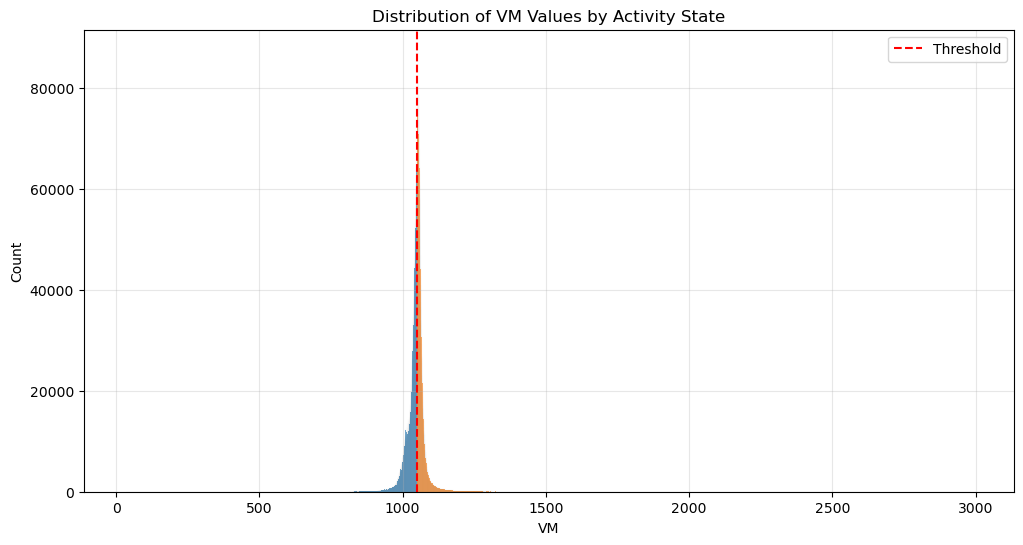

In [13]:
# Create box plot by state
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='state', y='VM')
plt.title('Vector Magnitude Distribution by Activity State')
plt.grid(True, alpha=0.3)
plt.show()

# Create histogram by state
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='VM', hue='state', multiple="layer", alpha=0.6)
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.title('Distribution of VM Values by Activity State')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [14]:
state_distribution.head(10)

state
resting    50.013733
active     49.986267
Name: proportion, dtype: float64

In [15]:
state_distribution.info

<bound method Series.info of state
resting    50.013733
active     49.986267
Name: proportion, dtype: float64>

In [16]:
df.head(21)

,timestamp,x,y,z,VM,state
0,2015-06-12 13:30:00.161041,100,620,804,1020.20,resting
1,2015-06-12 13:30:00.260490,68,640,800,1026.75,resting
2,2015-06-12 13:30:00.359939,48,628,884,1085.42,active
3,2015-06-12 13:30:00.459388,44,616,888,1081.64,active
4,2015-06-12 13:30:00.558837,76,628,860,1067.60,active
5,2015-06-12 13:30:00.658286,104,616,868,1069.44,active
6,2015-06-12 13:30:00.757735,120,596,868,1059.74,active
7,2015-06-12 13:30:00.857184,136,612,812,1025.86,resting
8,2015-06-12 13:30:00.956633,164,624,840,1059.18,active
9,2015-06-12 13:30:01.056082,168,596,840,1043.57,resting


In [17]:
# Calculate samples in 1 minute based on your data frequency
# Assuming 100Hz sampling rate (adjust this based on your actual sampling rate)
samples_per_minute = 60 * 100  

# Create smoothed VM using rolling window with number of samples
df['VM_smoothed'] = df['VM'].rolling(window=samples_per_minute, center=True).mean()

# Reclassify states using smoothed VM
threshold = 1050.14
df['state_smoothed'] = df['VM_smoothed'].apply(lambda x: 'resting' if x <= threshold else 'active')

# Display the results
print("First 10 rows with original and smoothed values:")
print(df[['VM', 'VM_smoothed', 'state', 'state_smoothed']].head(10))


First 10 rows with original and smoothed values:
        VM  VM_smoothed    state state_smoothed
0  1020.20          NaN  resting         active
1  1026.75          NaN  resting         active
2  1085.42          NaN   active         active
3  1081.64          NaN   active         active
4  1067.60          NaN   active         active
5  1069.44          NaN   active         active
6  1059.74          NaN   active         active
7  1025.86          NaN  resting         active
8  1059.18          NaN   active         active
9  1043.57          NaN  resting         active


In [18]:
df.head(11)

,timestamp,x,y,z,VM,state,VM_smoothed,state_smoothed
0,2015-06-12 13:30:00.161041,100,620,804,1020.20,resting,NaN,active
1,2015-06-12 13:30:00.260490,68,640,800,1026.75,resting,NaN,active
2,2015-06-12 13:30:00.359939,48,628,884,1085.42,active,NaN,active
3,2015-06-12 13:30:00.459388,44,616,888,1081.64,active,NaN,active
4,2015-06-12 13:30:00.558837,76,628,860,1067.60,active,NaN,active
5,2015-06-12 13:30:00.658286,104,616,868,1069.44,active,NaN,active
6,2015-06-12 13:30:00.757735,120,596,868,1059.74,active,NaN,active
7,2015-06-12 13:30:00.857184,136,612,812,1025.86,resting,NaN,active
8,2015-06-12 13:30:00.956633,164,624,840,1059.18,active,NaN,active
9,2015-06-12 13:30:01.056082,168,596,840,1043.57,resting,NaN,active


In [19]:
# Calculate window size for 1 minute (10 samples/second * 60 seconds)
window_size = 600

# Create smoothed VM using rolling window
df['VM_smoothed'] = df['VM'].rolling(window=window_size, center=True).mean()

# Reclassify states using smoothed VM
threshold = 1050.14
df['state_smoothed'] = df['VM_smoothed'].apply(lambda x: 'resting' if x <= threshold else 'active')

# Display the results
print("First 10 rows with original and smoothed values:")
print(df[['timestamp', 'VM', 'VM_smoothed', 'state', 'state_smoothed']].head(10))


First 10 rows with original and smoothed values:
                    timestamp       VM  VM_smoothed    state state_smoothed
0  2015-06-12 13:30:00.161041  1020.20          NaN  resting         active
1  2015-06-12 13:30:00.260490  1026.75          NaN  resting         active
2  2015-06-12 13:30:00.359939  1085.42          NaN   active         active
3  2015-06-12 13:30:00.459388  1081.64          NaN   active         active
4  2015-06-12 13:30:00.558837  1067.60          NaN   active         active
5  2015-06-12 13:30:00.658286  1069.44          NaN   active         active
6  2015-06-12 13:30:00.757735  1059.74          NaN   active         active
7  2015-06-12 13:30:00.857184  1025.86          NaN  resting         active
8  2015-06-12 13:30:00.956633  1059.18          NaN   active         active
9  2015-06-12 13:30:01.056082  1043.57          NaN  resting         active


C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


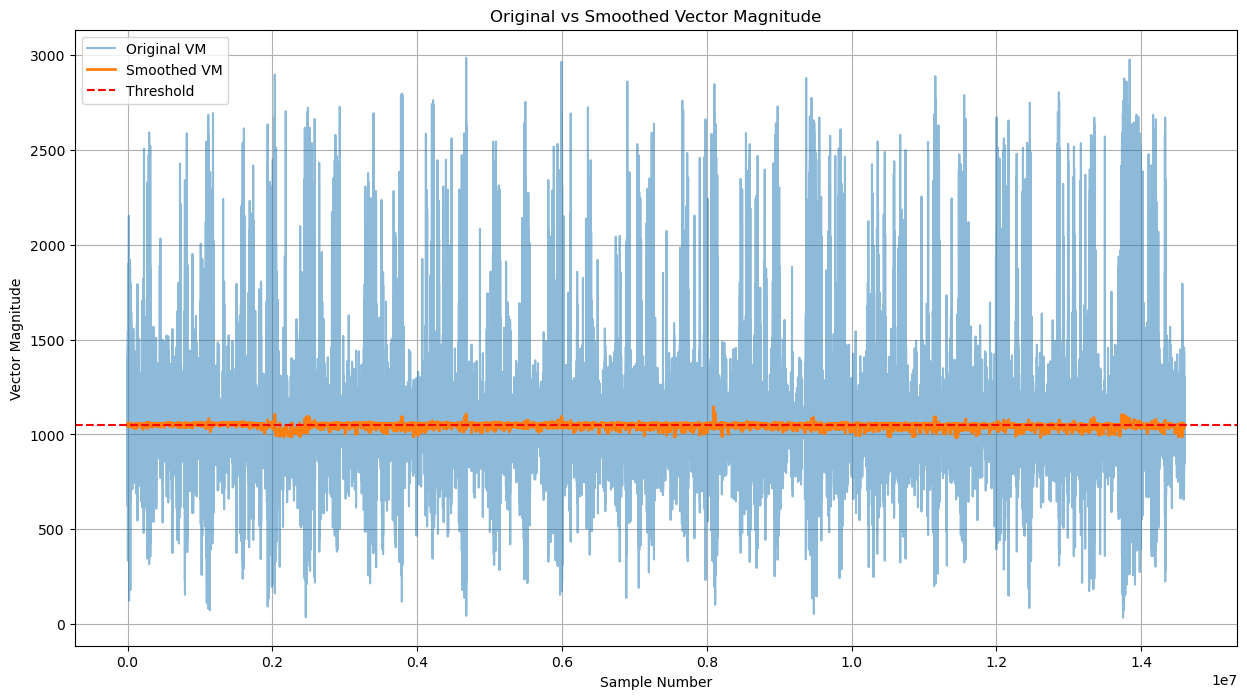


Percentage of time in each state:
state_smoothed
active     51.91
resting    48.09
Name: proportion, dtype: float64


In [20]:
# Plot original vs smoothed VM
plt.figure(figsize=(15, 8))
plt.plot(df.index, df['VM'], label='Original VM', alpha=0.5)
plt.plot(df.index, df['VM_smoothed'], label='Smoothed VM', linewidth=2)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title('Original vs Smoothed Vector Magnitude')
plt.xlabel('Sample Number')
plt.ylabel('Vector Magnitude')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and display new state statistics
print("\nPercentage of time in each state:")
state_dist = df['state_smoothed'].value_counts(normalize=True) * 100
print(state_dist.round(2))


In [21]:
# Calculate state durations
df['state_change'] = df['state_smoothed'] != df['state_smoothed'].shift(1)
df['state_group'] = df['state_change'].cumsum()

state_durations = df.groupby('state_group').agg({
    'state_smoothed': 'first',
    'timestamp': ['count', 'first', 'last']
})

# Convert counts to minutes (10 samples per second)
state_durations['duration_minutes'] = state_durations[('timestamp', 'count')] / 600

print("State Duration Analysis:")
print("\nAverage duration by state (minutes):")
print(state_durations.groupby([('state_smoothed', 'first')])['duration_minutes'].mean())


State Duration Analysis:

Average duration by state (minutes):
(state_smoothed, first)
active     0.889442
resting    0.823986
Name: duration_minutes, dtype: float64


In [22]:
# Detect state transitions by comparing each row with the previous one
df['state_change'] = df['state_smoothed'] != df['state_smoothed'].shift(1)

# Create groups of consecutive states using cumulative sum of changes
df['state_group'] = df['state_change'].cumsum()

# Calculate duration statistics for each state group
state_durations = df.groupby('state_group').agg({
    'state_smoothed': 'first',  # Get the state name
    'timestamp': ['count', 'first', 'last']  # Get count and timestamps
})

# Convert sample counts to minutes (600 samples = 1 minute at 10Hz)
state_durations['duration_minutes'] = state_durations[('timestamp', 'count')] / 600

# Display results
print("State Duration Analysis:")
print("\nAverage duration by state (minutes):")
print(state_durations.groupby([('state_smoothed', 'first')])['duration_minutes'].mean())


State Duration Analysis:

Average duration by state (minutes):
(state_smoothed, first)
active     0.889442
resting    0.823986
Name: duration_minutes, dtype: float64


In [23]:
#increasing the smoothing window to 5 minutes (3000 samples at 10Hz) to get more realistic state durations

In [24]:
# Set window size for 5-minute smoothing (3000 samples)
window_size = 3000  # 10Hz * 300 seconds = 3000 samples

# Apply rolling mean with centered window for smooth transitions
df['VM_smoothed'] = df['VM'].rolling(window=window_size, center=True).mean()

# Classify states using threshold
df['state_smoothed'] = df['VM_smoothed'].apply(lambda x: 'resting' if x <= threshold else 'active')

# Identify state transitions
df['state_change'] = df['state_smoothed'] != df['state_smoothed'].shift(1)
df['state_group'] = df['state_change'].cumsum()

# Calculate duration statistics
state_durations = df.groupby('state_group').agg({
    'state_smoothed': 'first',
    'timestamp': ['count', 'first', 'last']
})

# Convert to minutes (600 samples = 1 minute)
state_durations['duration_minutes'] = state_durations[('timestamp', 'count')] / 600

# Display results
print("New State Duration Analysis:")
print("\nAverage duration by state (minutes):")
print(state_durations.groupby([('state_smoothed', 'first')])['duration_minutes'].mean())


New State Duration Analysis:

Average duration by state (minutes):
(state_smoothed, first)
active     3.492036
resting    3.712623
Name: duration_minutes, dtype: float64


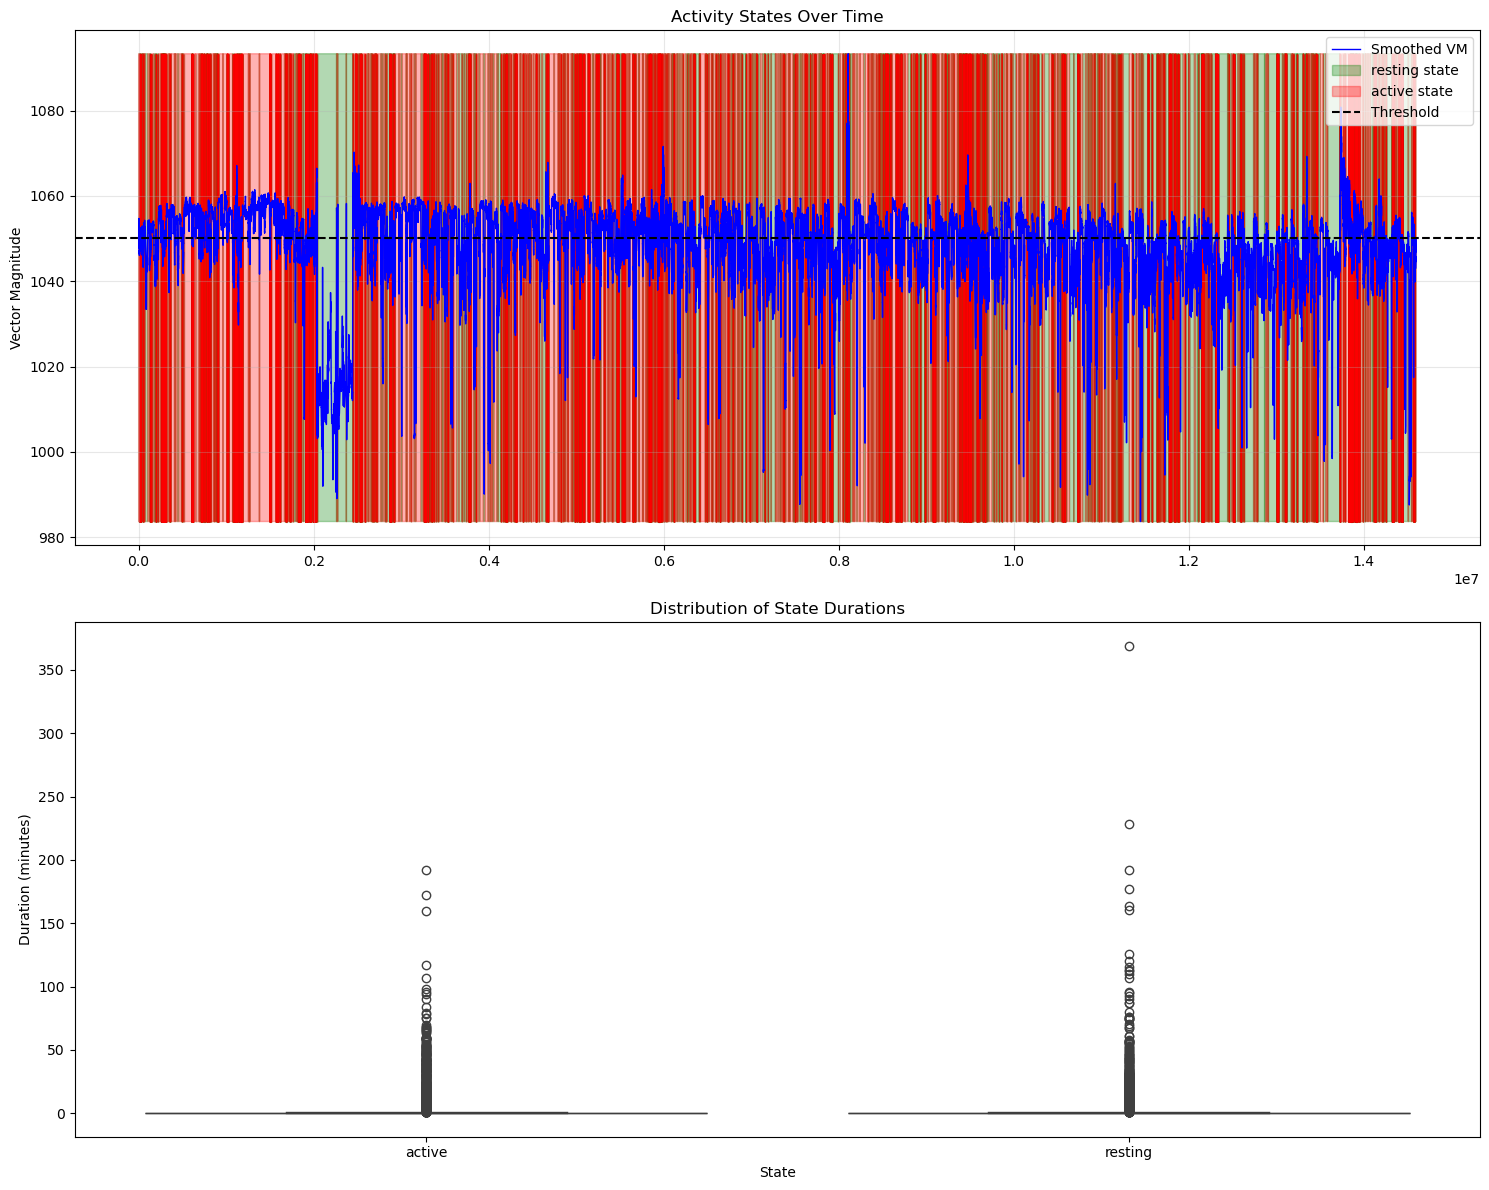


State Duration Statistics (minutes):
                          count      mean        std       min       25%  \
(state_smoothed, first)                                                    
active                   3377.0  3.492036  11.668213  0.001667  0.003333   
resting                  3376.0  3.712623  14.195435  0.001667  0.003333   

                              50%       75%         max  
(state_smoothed, first)                                  
active                   0.011667  0.400000  191.773333  
resting                  0.013333  0.475417  369.158333  


In [25]:
# Create efficient multi-panel plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top panel: Activity states visualization
ax1.plot(df.index, df['VM_smoothed'], 'b-', label='Smoothed VM', linewidth=1)

# Efficient state background plotting
states_dict = {
    'resting': {'color': 'green'},
    'active': {'color': 'red'}
}

for state, properties in states_dict.items():
    mask = df['state_smoothed'] == state
    ax1.fill_between(df.index, 
                     df['VM_smoothed'].min(), 
                     df['VM_smoothed'].max(),
                     where=mask, 
                     alpha=0.3,
                     label=f'{state} state',
                     color=properties['color'])

# Add threshold and formatting
ax1.axhline(y=threshold, color='black', linestyle='--', label='Threshold')
ax1.set_title('Activity States Over Time')
ax1.set_ylabel('Vector Magnitude')
ax1.legend(loc='upper right')  # Fixed legend position for better performance
ax1.grid(True, alpha=0.3)

# Bottom panel: Duration distribution
sns.boxplot(data=state_durations, 
            x=('state_smoothed', 'first'), 
            y='duration_minutes', 
            ax=ax2)
ax2.set_title('Distribution of State Durations')
ax2.set_xlabel('State')
ax2.set_ylabel('Duration (minutes)')

plt.tight_layout()
plt.show()

# Quick statistics display
print("\nState Duration Statistics (minutes):")
print(state_durations.groupby([('state_smoothed', 'first')])['duration_minutes'].describe())


In [26]:
# Geting the first hour of data

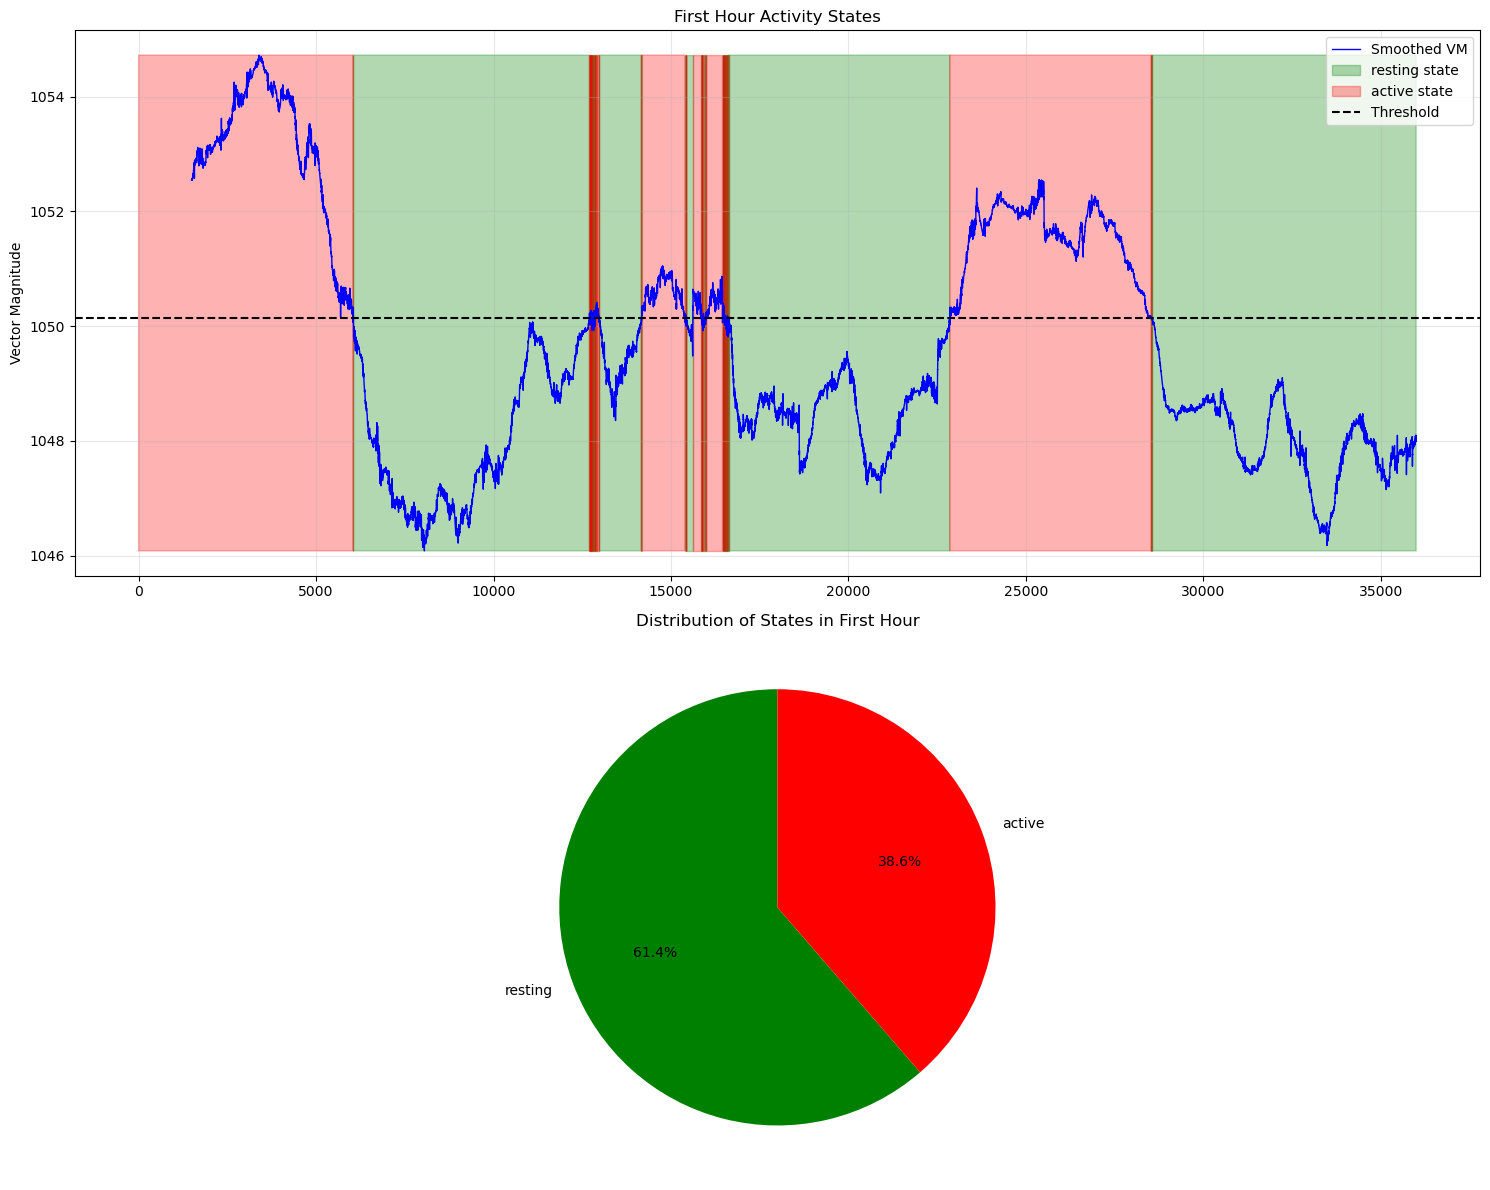


First Hour Activity Summary:
Total samples in first hour: 36000

Percentage of time in each state:
state_smoothed
resting    61.35
active     38.65
Name: count, dtype: float64


In [27]:
# Extract first hour efficiently
first_hour = df.iloc[0:36000]  # 10Hz * 60 seconds * 60 minutes = 36000 samples

# Create multi-panel visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Time series plot with efficient state coloring
ax1.plot(first_hour.index, first_hour['VM_smoothed'], 'b-', 
         label='Smoothed VM', linewidth=1)

states_dict = {
    'resting': {'color': 'green'},
    'active': {'color': 'red'}
}

for state, properties in states_dict.items():
    mask = first_hour['state_smoothed'] == state
    ax1.fill_between(first_hour.index, 
                     first_hour['VM_smoothed'].min(), 
                     first_hour['VM_smoothed'].max(),
                     where=mask, 
                     alpha=0.3,
                     label=f'{state} state',
                     color=properties['color'])

# Add threshold and formatting
ax1.axhline(y=threshold, color='black', linestyle='--', label='Threshold')
ax1.set_title('First Hour Activity States')
ax1.set_ylabel('Vector Magnitude')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Efficient pie chart creation
state_counts = first_hour['state_smoothed'].value_counts()
ax2.pie(state_counts, 
        labels=state_counts.index, 
        autopct='%1.1f%%', 
        colors=['green', 'red'], 
        startangle=90)
ax2.set_title('Distribution of States in First Hour')

plt.tight_layout()
plt.show()

# Quick summary statistics
print("\nFirst Hour Activity Summary:")
print(f"Total samples in first hour: {len(first_hour)}")
print("\nPercentage of time in each state:")
print((state_counts/len(first_hour)*100).round(2))


In [28]:
# Get first three hours of data

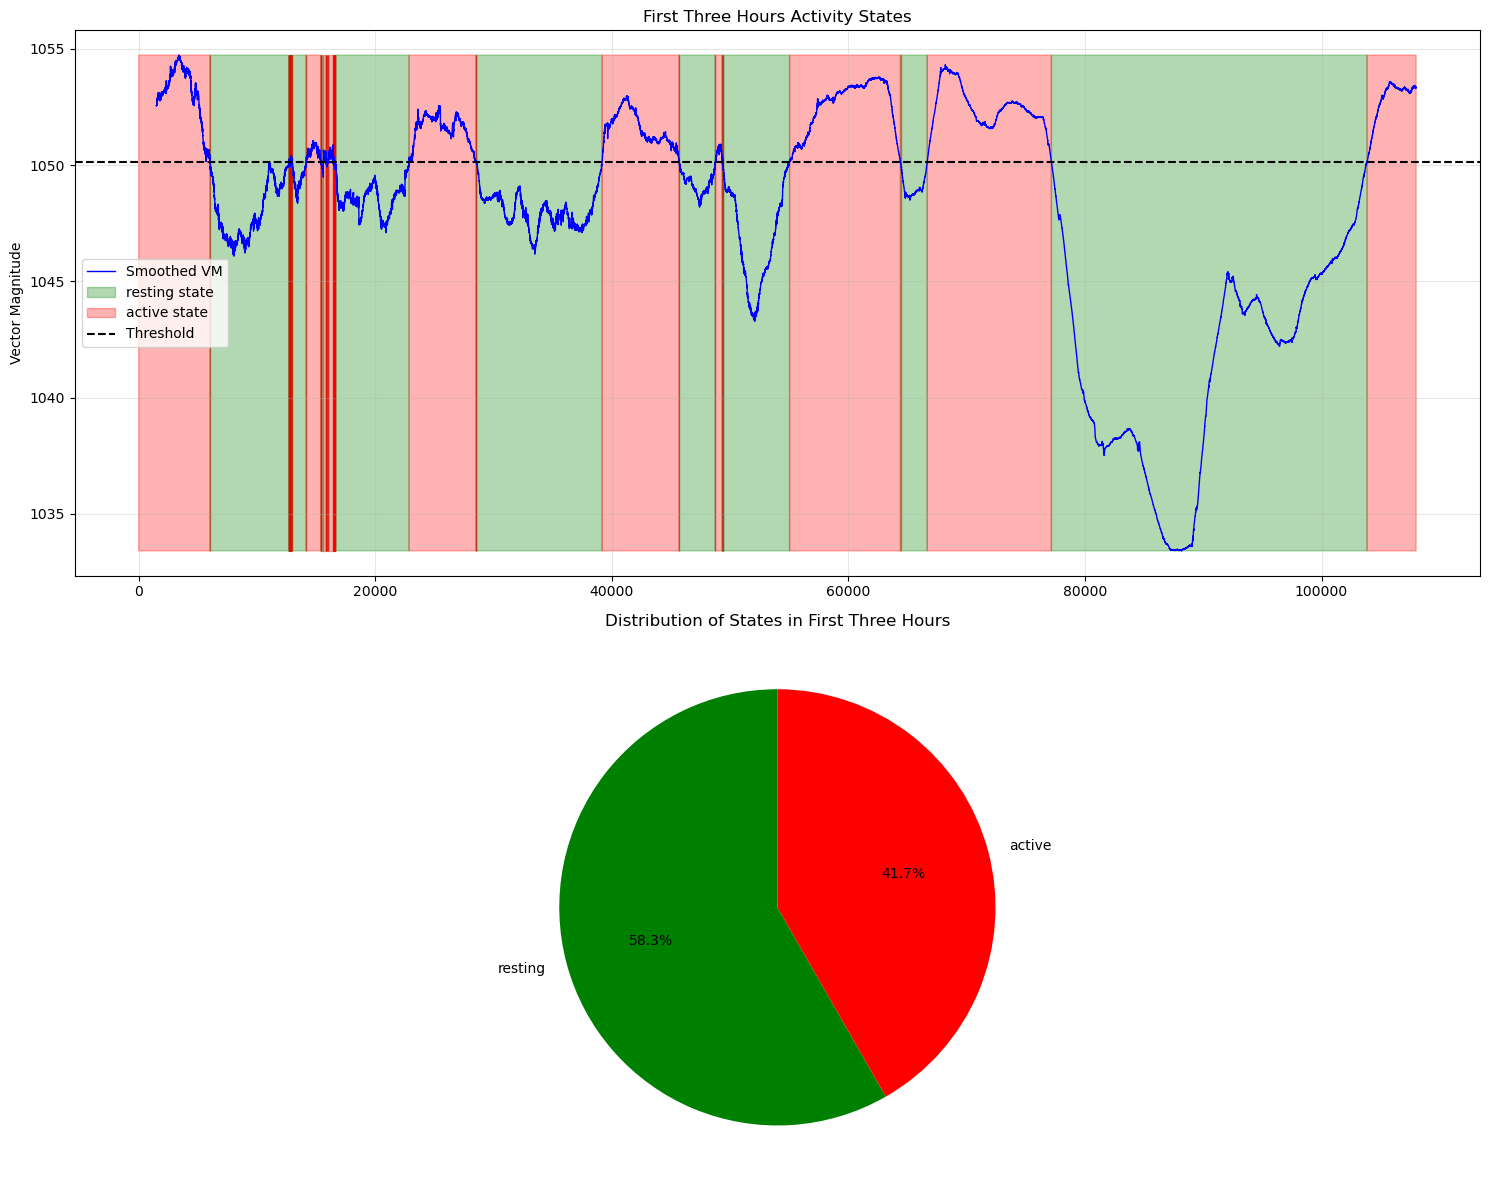


First Three Hours Activity Summary:
Total samples analyzed: 108000

Percentage of time in each state:
state_smoothed
resting    58.28
active     41.72
Name: count, dtype: float64


In [29]:
# Get first three hours of data
three_hours = df.iloc[0:108000]  

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Time series plot
ax1.plot(three_hours.index, three_hours['VM_smoothed'], 'b-', label='Smoothed VM', linewidth=1)
for state in ['resting', 'active']:
    mask = three_hours['state_smoothed'] == state
    ax1.fill_between(three_hours.index, three_hours['VM_smoothed'].min(), 
                     three_hours['VM_smoothed'].max(),
                     where=mask, alpha=0.3,
                     label=f'{state} state',
                     color='green' if state == 'resting' else 'red')
ax1.axhline(y=threshold, color='black', linestyle='--', label='Threshold')
ax1.set_title('First Three Hours Activity States')
ax1.set_ylabel('Vector Magnitude')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Pie chart
state_counts = three_hours['state_smoothed'].value_counts()
colors = ['green', 'red']
ax2.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
ax2.set_title('Distribution of States in First Three Hours')

plt.tight_layout()
plt.show()

# Print summary statistics
print("\nFirst Three Hours Activity Summary:")
print(f"Total samples analyzed: {len(three_hours)}")
print("\nPercentage of time in each state:")
print((state_counts/len(three_hours)*100).round(2))


In [30]:
df.info

<bound method DataFrame.info of                            timestamp    x     y    z       VM    state  \
0         2015-06-12 13:30:00.161041  100   620  804  1020.20  resting   
1         2015-06-12 13:30:00.260490   68   640  800  1026.75  resting   
2         2015-06-12 13:30:00.359939   48   628  884  1085.42   active   
3         2015-06-12 13:30:00.459388   44   616  888  1081.64   active   
4         2015-06-12 13:30:00.558837   76   628  860  1067.60   active   
...                              ...  ...   ...  ...      ...      ...   
14595848  2015-06-29 08:29:59.416163   76  1040 -128  1050.60   active   
14595849  2015-06-29 08:29:59.515527   68  1052 -140  1063.45   active   
14595850  2015-06-29 08:29:59.614891  112  1024 -132  1038.53  resting   
14595851  2015-06-29 08:29:59.714255  104  1052 -152  1068.00   active   
14595852  2015-06-29 08:29:59.813619   84  1044 -132  1055.66   active   

          VM_smoothed state_smoothed  state_change  state_group  
0            

In [31]:
df.iloc[100000]

# Or if you want multiple rows:
df.iloc[100000:100010]  # For a range of rows


,timestamp,x,y,z,VM,state,VM_smoothed,state_smoothed,state_change,state_group
100000,2015-06-12 16:15:45.061041,544,644,632,1053.61,active,1045.306600,resting,False,126
100001,2015-06-12 16:15:45.160490,544,644,624,1048.83,resting,1045.305633,resting,False,126
100002,2015-06-12 16:15:45.259939,544,640,620,1044.00,resting,1045.308073,resting,False,126
100003,2015-06-12 16:15:45.359388,536,644,620,1042.32,resting,1045.312170,resting,False,126
100004,2015-06-12 16:15:45.458837,544,644,628,1051.22,active,1045.312717,resting,False,126
100005,2015-06-12 16:15:45.558286,540,640,620,1041.92,resting,1045.310303,resting,False,126
100006,2015-06-12 16:15:45.657735,540,636,624,1041.86,resting,1045.311180,resting,False,126
100007,2015-06-12 16:15:45.757184,536,636,616,1035.01,resting,1045.311133,resting,False,126
100008,2015-06-12 16:15:45.856633,540,636,616,1037.09,resting,1045.311813,resting,False,126
100009,2015-06-12 16:15:45.956082,540,636,620,1039.47,resting,1045.312027,resting,False,126


In [32]:
#the chart below shows the overal resting/active states of the cow

Number of recordings in each state:
state_smoothed
resting    7520290
active     7075563
Name: count, dtype: int64

Percentage of time in each state:
state_smoothed
resting    51.52
active     48.48
Name: count, dtype: float64


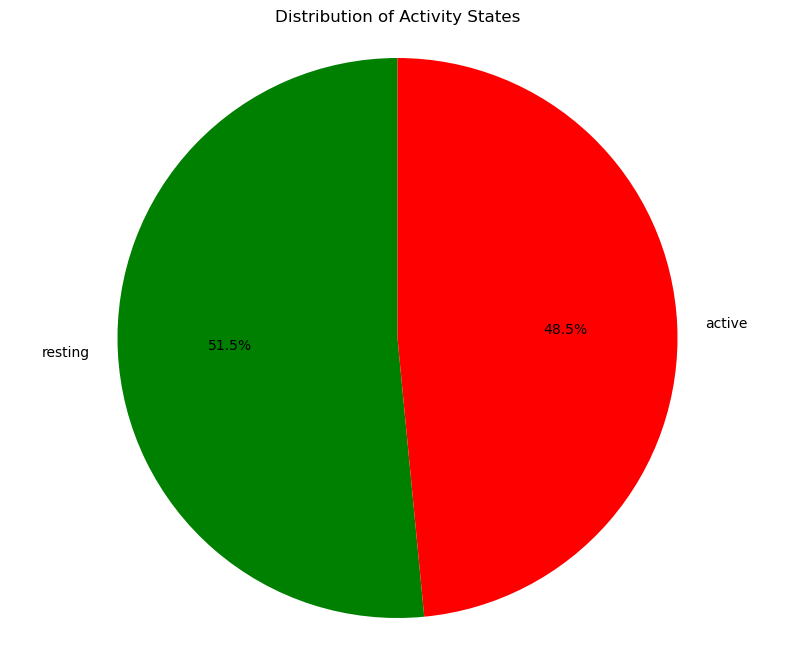

In [33]:
# Calculate state counts
state_counts = df['state_smoothed'].value_counts()
print("Number of recordings in each state:")
print(state_counts)

# Calculate percentages
state_percentages = (state_counts / len(df) * 100).round(2)
print("\nPercentage of time in each state:")
print(state_percentages)

# Create pie chart
plt.figure(figsize=(10, 8))
colors = ['green', 'red']
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribution of Activity States')
plt.axis('equal')
plt.show()


In [34]:
# Calculate total samples
total_samples = len(df)

# Calculate duration in different units
seconds = total_samples / 10  # 10 samples per second
minutes = seconds / 60
hours = minutes / 60

print(f"Total samples: {total_samples:,}")
print(f"Duration in seconds: {seconds:,.2f}")
print(f"Duration in minutes: {minutes:,.2f}")
print(f"Duration in hours: {hours:,.2f}")


Total samples: 14,595,853
Duration in seconds: 1,459,585.30
Duration in minutes: 24,326.42
Duration in hours: 405.44


In [35]:
#this data took 16 days to collect

In [39]:
#now here i deal with 6 hours of data

In [36]:
# Calculate sample index for 6 hours (10Hz * 60 seconds * 60 minutes * 6 hours)
six_hour_samples = 10 * 60 * 60 * 6  # 216000 samples

# Get the timestamp at 6 hours
six_hour_timestamp = df['timestamp'].iloc[six_hour_samples]
print(f"First timestamp: {df['timestamp'].iloc[0]}")
print(f"6-hour timestamp: {six_hour_timestamp}")


First timestamp: 2015-06-12 13:30:00.161041
6-hour timestamp: 2015-06-12 19:28:01.145041


In [37]:
# Get first 6 hours of data
six_hours_data = df.iloc[:216000].copy()  # 216000 = 10Hz * 60sec * 60min * 6hrs

# Detect state changes
six_hours_data['state_change'] = six_hours_data['state_smoothed'] != six_hours_data['state_smoothed'].shift(1)
state_changes = six_hours_data[six_hours_data['state_change']]

# Create new DataFrame with state transitions
transitions = []
current_state = six_hours_data['state_smoothed'].iloc[0]
start_time = six_hours_data['timestamp'].iloc[0]

for idx, row in state_changes.iterrows():
    transitions.append({
        'state': current_state,
        'start_time': start_time,
        'end_time': row['timestamp']
    })
    current_state = row['state_smoothed']
    start_time = row['timestamp']

# Create final DataFrame
state_periods = pd.DataFrame(transitions)

# Display the results
print("State Transition Periods:")
print(state_periods)


State Transition Periods:
       state                  start_time                    end_time
0     active  2015-06-12 13:30:00.161041  2015-06-12 13:30:00.161041
1     active  2015-06-12 13:30:00.161041  2015-06-12 13:40:00.733552
2    resting  2015-06-12 13:40:00.733552  2015-06-12 13:40:01.330246
3     active  2015-06-12 13:40:01.330246  2015-06-12 13:40:02.125838
4    resting  2015-06-12 13:40:02.125838  2015-06-12 13:51:03.362239
..       ...                         ...                         ...
193   active  2015-06-12 19:01:20.911182  2015-06-12 19:01:29.563245
194  resting  2015-06-12 19:01:29.563245  2015-06-12 19:01:29.762143
195   active  2015-06-12 19:01:29.762143  2015-06-12 19:01:40.104839
196  resting  2015-06-12 19:01:40.104839  2015-06-12 19:02:04.867640
197   active  2015-06-12 19:02:04.867640  2015-06-12 19:02:13.420254

[198 rows x 3 columns]


In [38]:
state_periods.shape

(198, 3)

In [ ]:
state_periods.head(11)

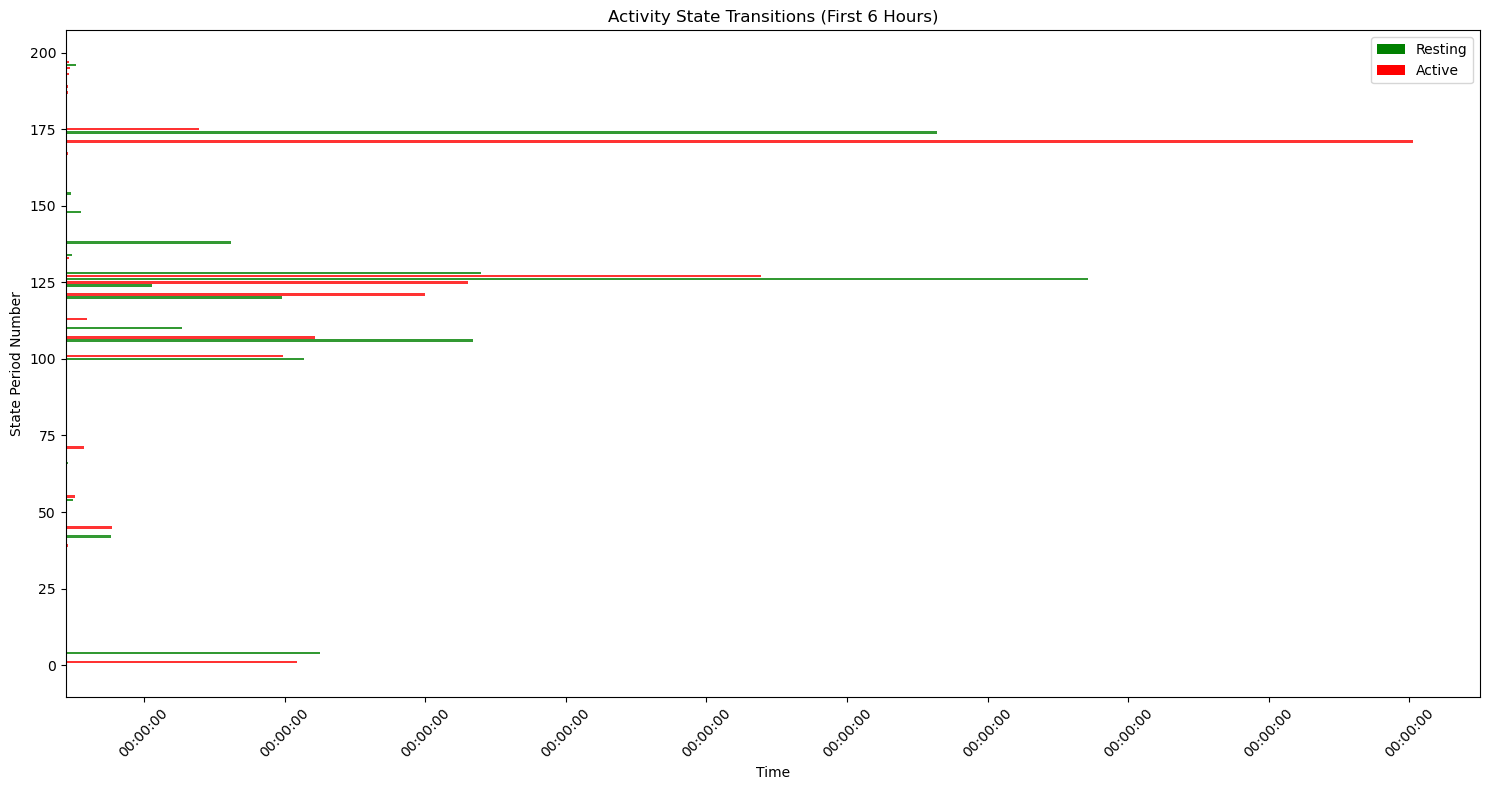

In [42]:
import matplotlib.dates as mdates
# Convert timestamps to datetime objects
state_periods['start_time'] = pd.to_datetime(state_periods['start_time'])
state_periods['end_time'] = pd.to_datetime(state_periods['end_time'])

# Create Gantt chart
fig, ax = plt.subplots(figsize=(15, 8))

# Plot each state period as a horizontal bar
for idx, period in state_periods.iterrows():
    color = 'green' if period['state'] == 'resting' else 'red'
    ax.barh(idx, 
            width=(period['end_time'] - period['start_time']).total_seconds(),
            left=period['start_time'],
            color=color,
            alpha=0.8)

# Customize the plot
ax.set_title('Activity State Transitions (First 6 Hours)')
ax.set_xlabel('Time')
ax.set_ylabel('State Period Number')

# Format x-axis to show readable timestamps
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', label='Resting'),
                  Patch(facecolor='red', label='Active')]
ax.legend(handles=legend_elements)

plt.tight_layout()
plt.show()